In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

In [8]:

#Primera toma, bobina constante a 4A y espira cambiante
m1 = np.array([30,37.5,60,67.5,97.5]) #(mg)
i1 = np.array([1,1.5,2,2.5,3]) #(mg)
#Segundo toma, espira constante a 2A y bobina cambiante
m2 = np.array([22.5,30,37.5,45,52.5,60,67.5]) #(A)
i2 = np.array([1,1.5,2,2.5,3,3.5,4]) #(A)
#Otras medidas
l1 = 0.145 #longitud bobina de solenoide (m)
l2=0.038 #longitud anche de espira (m)

for i in range(len(m1)):
    m1[i]=(m1[i]*pow(10,-5))*9.807
for i in range(len(m2)):
    m2[i]=(m2[i]*pow(10,-5))*9.807
    
for i in range(len(i1)):
    i1[i]=i1[i]*0.038

tabla1 = pd.DataFrame({
    'I1':i1,'m1':m1})
tabla2 = pd.DataFrame({
    'I2':i2,'m2':m2
})
tabla1,tabla2

(      I1        m1
 0  0.038  0.002942
 1  0.057  0.003678
 2  0.076  0.005884
 3  0.095  0.006620
 4  0.114  0.009562,
     I2        m2
 0  1.0  0.002207
 1  1.5  0.002942
 2  2.0  0.003678
 3  2.5  0.004413
 4  3.0  0.005149
 5  3.5  0.005884
 6  4.0  0.006620)

In [9]:
def regresion_1(t,gamma):
  slope, intercept, r, p, std_err = stats.linregress(t,gamma)
  def myfunc(x):
    return slope * x + intercept
  
  mymodel = list(map(myfunc, t))
  
  r_squared = r**2
  
  print('slope:', slope)
  print('intercept:', intercept)
  print('r:', r)
  print('R^2:', r_squared)
  print('p:', p)
  print('std_err:', std_err)
  return mymodel

In [10]:
r1 = regresion_1(i1,m1)

slope: 0.08516605263157895
intercept: -0.0007355249999999999
r: 0.976092160357725
R^2: 0.9527559055118107
p: 0.004421613227408328
std_err: 0.01094936242594184


In [11]:
r2 = regresion_1(m2,i2)

slope: 679.7865470242343
intercept: -0.5
r: 1.0
R^2: 1.0
p: 1.9206748078018256e-50
std_err: 0.0


Pendiente (slope): 0.08516605263157895
Intersección (intercept): -0.0007355249999999999
Coeficiente de correlación (r): 0.976092160357725
Coeficiente de determinación (R^2): 0.9527559055118107
Valor p (p-value): 0.004421613227408328
Error estándar (std_err): 0.01094936242594184


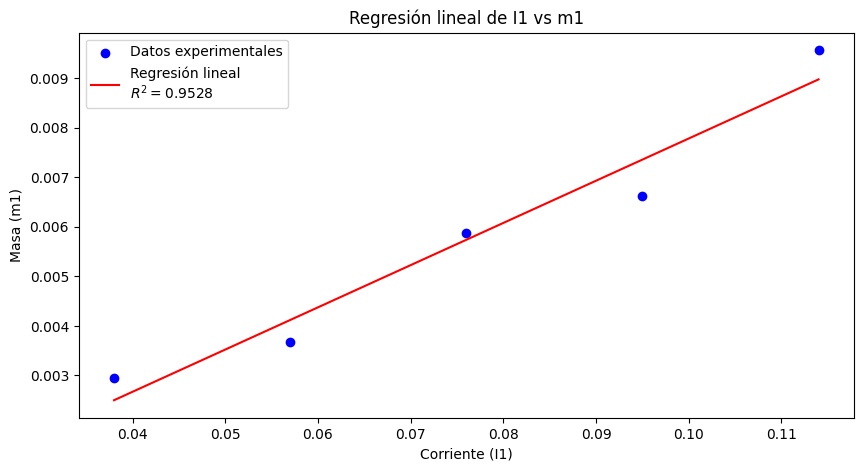

In [12]:
def linear_regression(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    def model(x):
        return slope * x + intercept
    
    r_squared = r_value**2
    
    print('Pendiente (slope):', slope)
    print('Intersección (intercept):', intercept)
    print('Coeficiente de correlación (r):', r_value)
    print('Coeficiente de determinación (R^2):', r_squared)
    print('Valor p (p-value):', p_value)
    print('Error estándar (std_err):', std_err)
    
    return model, slope, intercept, r_squared, p_value, std_err

# Ejemplo de uso
modelo, pendiente, interseccion, r_cuadrado, valor_p, error_std = linear_regression(i1, m1)
# Graficar los datos y la regresión lineal
plt.figure(figsize=(10, 5))
plt.scatter(i1, m1, color='blue', label='Datos experimentales')
plt.plot(i1, modelo(np.array(i1)), color='red', label=f'Regresión lineal\n$R^2 = {r_cuadrado:.4f}$')
plt.xlabel('Corriente (I1)')
plt.ylabel('Masa (m1)')
plt.title('Regresión lineal de I1 vs m1')
plt.legend()
plt.show()